<a href="https://colab.research.google.com/github/Frost-Codes/Mask-No-Mask-binary-Classification/blob/main/maskNoMask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
! conda install -c conda-forge keras-preprocessing #for anaconda

/bin/bash: conda: command not found


In [58]:
! pip install keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import cv2
import os
from matplotlib import pyplot as plt

In [5]:
os.listdir()

['.config', 'drive', 'sample_data']

In [7]:
os.chdir('../')

In [8]:
os.chdir('./root')

In [9]:
os.mkdir('.kaggle')

In [10]:
os.chdir('./.kaggle')

In [ ]:
from google.colab import files
files.upload()

In [14]:
os.chdir('../')

In [15]:
os.chdir('./content/')

In [16]:
! chmod 600 /root/.kaggle/kaggle.json

In [17]:
! kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

100% 330M/330M [00:16<00:00, 24.5MB/s]
100% 330M/330M [00:16<00:00, 21.5MB/s]


In [18]:
os.listdir()

['.config', 'drive', 'face-mask-12k-images-dataset.zip', 'sample_data']

In [19]:
os.mkdir('.data')

In [20]:
! mv face-mask-12k-images-dataset.zip .data/

In [21]:
os.chdir('./.data')

In [ ]:
! unzip face-mask-12k-images-dataset.zip

In [23]:
! ls

 face-mask-12k-images-dataset.zip  'Face Mask Dataset'


In [24]:
! ls 'Face Mask Dataset'

Test  Train  Validation


In [25]:
! ls 'Face Mask Dataset/Train'

WithMask  WithoutMask


In [26]:
os.getcwd()

'/content/.data'

In [27]:
TRAINDIRECTORY = './Face Mask Dataset/Train'
TESTDIRECTORY = './Face Mask Dataset/Test'
VALIDATIONDIRECTORY = './Face Mask Dataset/Validation'
CATEGORIES = ['WithMask', 'WithoutMask']
SIZE = 100

In [28]:
print(f"Train: WithMask: {len(os.listdir(os.path.join(TRAINDIRECTORY, 'WithMask')))}")
print(f"Train: WithoutMask: {len(os.listdir(os.path.join(TRAINDIRECTORY, 'WithoutMask')))}")

print(f"Test: WithMask: {len(os.listdir(os.path.join(TESTDIRECTORY, 'WithMask')))}")
print(f"Test: WithoutMask: {len(os.listdir(os.path.join(TESTDIRECTORY, 'WithoutMask')))}")

print(f"Validation: WithMask: {len(os.listdir(os.path.join(VALIDATIONDIRECTORY, 'WithMask')))}")
print(f"Validation: WithoutMask: {len(os.listdir(os.path.join(VALIDATIONDIRECTORY, 'WithoutMask')))}")


Train: WithMask: 5000
Train: WithoutMask: 5000
Test: WithMask: 483
Test: WithoutMask: 509
Validation: WithMask: 400
Validation: WithoutMask: 400


In [29]:
from keras_preprocessing.image import ImageDataGenerator

In [30]:
train_datagen = ImageDataGenerator( horizontal_flip=True, shear_range=0.2,
                                   rescale= 1./255, zoom_range=0.2,)

test_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [36]:
train_data = train_datagen.flow_from_directory(TRAINDIRECTORY, 
                                              target_size=(224,224), batch_size=32, shuffle = True,
                                              seed = 42,class_mode = "categorical",classes = ['WithoutMask','WithMask'])

test_data = test_datagen.flow_from_directory(TESTDIRECTORY, 
                                              target_size=(224,224), batch_size=32, shuffle = True,
                                              seed = 42,class_mode = "categorical",classes = ['WithoutMask','WithMask'])

validation_data = validation_datagen.flow_from_directory(VALIDATIONDIRECTORY, 
                                              target_size=(224,224), batch_size=32, shuffle = True, 
                                              seed = 42,class_mode = "categorical",classes = ['WithoutMask','WithMask'])


Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [37]:
train_data.class_indices

{'WithoutMask': 0, 'WithMask': 1}

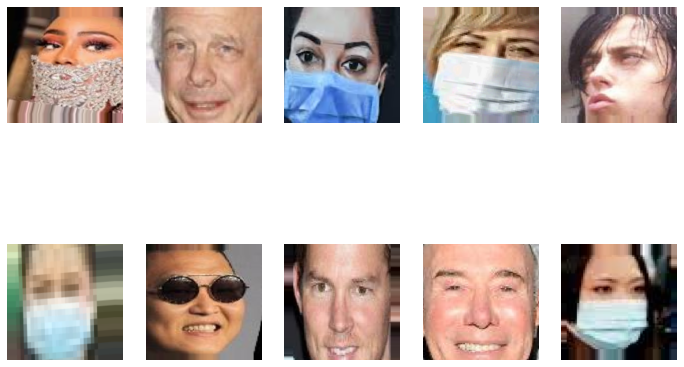

In [53]:
rows = 2
columns = 5
figure = plt.figure(figsize=(12, 8))
for image in range(1, 11):
  figure.add_subplot(rows, columns, image)
  img = next(train_data)[0]
  img = np.squeeze(img)
  plt.imshow(img[image-1])
  plt.axis('off')


In [ ]:
## model phase

In [44]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.mobilenet_v2 import MobileNetV2

In [59]:
mobilenet = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)

for layer in mobilenet.layers:
  layer.trainable = False

model = Sequential()
model.add(mobilenet)
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_3 (Flatten)         (None, 62720)             0         
                                                                 
 dense_2 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 2,383,426
Trainable params: 125,442
Non-trainable params: 2,257,984
_________________________________________________________________


In [61]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
%%time
history = model.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
313/313 [==============================] - 119s 373ms/step - loss: 0.2159 - accuracy: 0.9808 - val_loss: 0.2039 - val_accuracy: 0.9912
Epoch 2/10
313/313 [==============================] - 115s 367ms/step - loss: 0.1233 - accuracy: 0.9935 - val_loss: 0.2215 - val_accuracy: 0.9937
Epoch 3/10
313/313 [==============================] - 114s 365ms/step - loss: 0.0984 - accuracy: 0.9944 - val_loss: 0.4045 - val_accuracy: 0.9925
Epoch 4/10
313/313 [==============================] - 114s 365ms/step - loss: 0.1031 - accuracy: 0.9949 - val_loss: 0.2064 - val_accuracy: 0.9937
Epoch 5/10
313/313 [==============================] - 115s 368ms/step - loss: 0.0327 - accuracy: 0.9977 - val_loss: 0.0778 - val_accuracy: 0.9975
Epoch 6/10
313/313 [==============================] - 114s 364ms/step - loss: 0.0602 - accuracy: 0.9969 - val_loss: 0.2875 - val_accuracy: 0.9875
Epoch 7/10
313/313 [==============================] - 114s 363ms/step - loss: 0.0669 - accuracy: 0.9966 - val_loss: 0.4726 -

In [63]:
type(test_data)

keras_preprocessing.image.directory_iterator.DirectoryIterator

In [64]:
mobile_history = history.history
mobile_history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

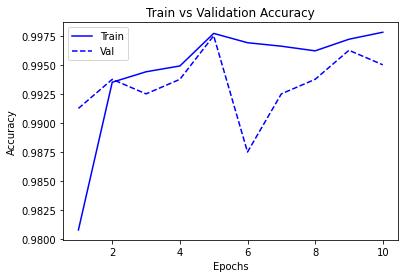

In [66]:
train_acc = mobile_history['accuracy']
val_acc = mobile_history['val_accuracy']
epochs = range(1, len(train_acc)+1)

plt.plot(epochs, train_acc, 'b', label = 'Train')
plt.plot(epochs, val_acc, 'b--', label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.show()


In [67]:
model.evaluate(test_data)

31/31 [==============================] - 2s 69ms/step - loss: 0.1146 - accuracy: 0.9970


[0.11462860554456711, 0.9969757795333862]